### MCMC Plots

In [1]:
#--------------- Packages ---------------#
%load_ext autoreload
%autoreload 2
import emcee
import random
import Corrfunc
import numpy as np
from classy import Class
import cluster_toolkit as ctk
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from chainconsumer import ChainConsumer
from colossus.cosmology import cosmology
from cluster_toolkit import miscentering
from colossus.halo import concentration, profile_nfw, profile_composite
plt.style.use("~/Titus/Lensing/wl_mass_calibration/MNRAS.mplstyle")
%matplotlib inline

In [2]:
burnin = 1000

In [4]:
## Final (changed covariance) - mini Uchuu
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] #new data, true_mass*h mini Uchuu
# true_params = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 
# true_params = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0
# true_params = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0
true_params = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0

print(np.log10(mean_mass_true_arr))
# true_params

[14.29469918 14.45726209 14.60902957 14.80816268]


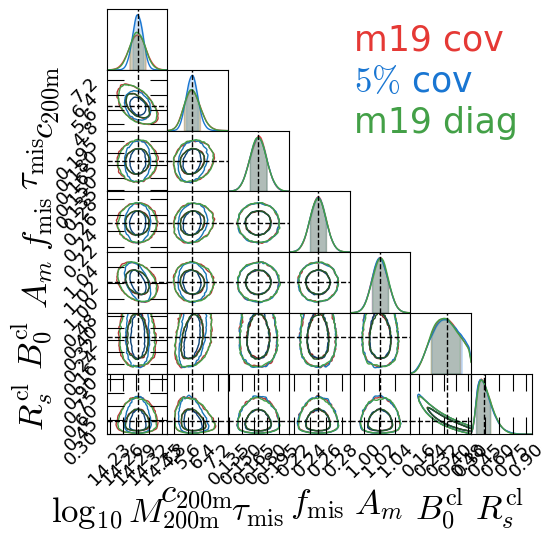

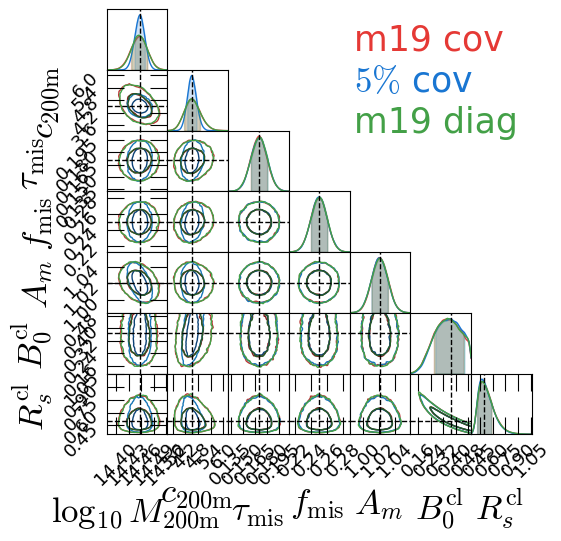

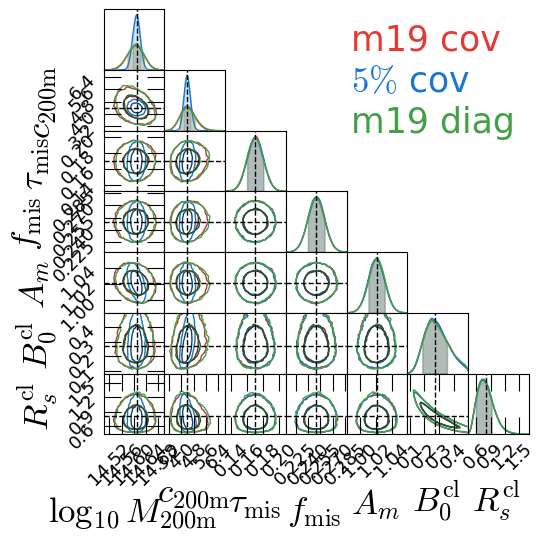

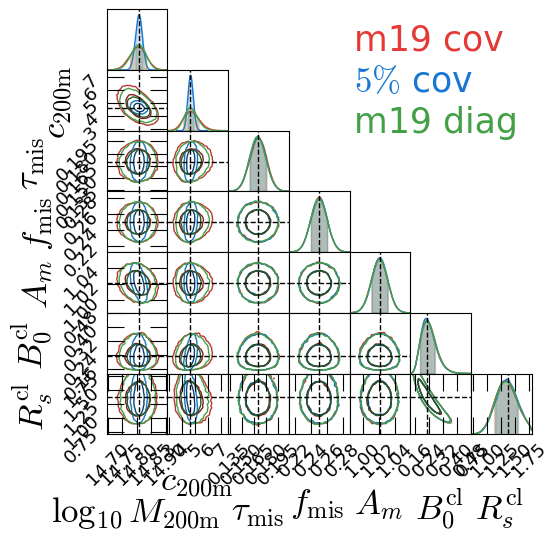

In [6]:
%matplotlib inline

# File paths for MCMC results
mcmc_path = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
readerfile_m19_diag_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_m19_diag_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_m19_diag_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_m19_diag_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_5per_cov_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_5per_cov_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_5per_cov_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_5per_cov_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_m19_cov_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_m19_cov_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_m19_cov_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_m19_cov_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

## Final (changed covariance) - mini Uchuu
# mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] #new data, true_mass*h mini Uchuu
params0 = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 
params1 = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0
params2 = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0
params3 = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0
params = [params0, params1, params2, params3]

file_list = [
    [readerfile_m19_diag_0, readerfile_5per_cov_0, readerfile_m19_cov_0],
    [readerfile_m19_diag_1, readerfile_5per_cov_1, readerfile_m19_cov_1],
    [readerfile_m19_diag_2, readerfile_5per_cov_2, readerfile_m19_cov_2],
    [readerfile_m19_diag_3, readerfile_5per_cov_3, readerfile_m19_cov_3]
]

labels21 = [r"$\rm \log_{10}\mathit{M}_{200m}$", r"$\rm \mathit{c}_{200m}$", r"$\rm \mathit{\tau}_{mis}$", r"$\rm \mathit{f}_{mis}$", r"$\rm \mathit{A_m}$", r"$\rm \mathit{B}^{cl}_0$", r"$\rm \mathit{R}^{cl}_\mathit{s}$"]
names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
burnin = 1000

for i in range(4):
    readerfile0 = file_list[i][0]
    readerfile1 = file_list[i][1]
    readerfile2 = file_list[i][2]

    reader0 = emcee.backends.HDFBackend(mcmc_path+readerfile0)
    reader1 = emcee.backends.HDFBackend(mcmc_path+readerfile1)
    reader2 = emcee.backends.HDFBackend(mcmc_path+readerfile2)

    flat_samples0 = reader0.get_chain(discard=burnin, flat=True)
    flat_samples1 = reader1.get_chain(discard=burnin, flat=True)
    flat_samples2 = reader2.get_chain(discard=burnin, flat=True)
    
    # all radii
    new_flat_samples0 = np.stack([flat_samples0[:,0], flat_samples0[:,1], 
                                 flat_samples0[:,4], flat_samples0[:,5], 
                                 flat_samples0[:,6], flat_samples0[:,2], 
                                 flat_samples0[:,3]], axis=1)
    
    # small radii
    new_flat_samples1 = np.stack([flat_samples1[:,0], flat_samples1[:,1], 
                                 flat_samples1[:,4], flat_samples1[:,5], 
                                 flat_samples1[:,6], flat_samples1[:,2], 
                                 flat_samples1[:,3]], axis=1)
    
    # large radii
    new_flat_samples2 = np.stack([flat_samples2[:,0], flat_samples2[:,1], 
                                 flat_samples2[:,4], flat_samples2[:,5], 
                                 flat_samples2[:,6], flat_samples2[:,2], 
                                 flat_samples2[:,3]], axis=1)
    
    true_params = np.array([params[i][0], params[i][1], 
                             params[i][4], params[i][5], 
                             params[i][6], params[i][2], 
                             params[i][3]]) 
    
    ##############
    chain = ChainConsumer()
    chain.add_chain(new_flat_samples2, parameters=labels21, name=r"m19 cov")
    chain.add_chain(new_flat_samples1, parameters=labels21, name=r"$5\%$ cov")
    chain.add_chain(new_flat_samples0, parameters=labels21, name=r"m19 diag")
    
    ##############
    chain.configure(summary=True, spacing=0.0, diagonal_tick_labels=True, 
                tick_font_size=13, label_font_size=25, max_ticks=5, 
                shade_gradient=1.0, colors=['red', 'blue', 'green'], sigma2d=False,
                sigmas=[1, 2], shade_alpha=[0.0, 0.0, 0.0], smooth = True, #kde = True, 
                summary_area=0.6827, contour_labels = None, 
                contour_label_font_size = 0, flip=True, bar_shade=True)
    chain.configure_truth(color='k', ls="--", alpha=1.0)
    chain.analysis.get_summary(parameters=labels21)
    fig = chain.plotter.plot(display=True, figsize="column", truth=true_params)
    fig.set_size_inches(11 + fig.get_size_inches())  # Resize fig for doco. You don't need this.
